# data explore

In [2]:
import numpy as np
import pandas as pd
import math
from collections import deque
import re
import data_loading.deque as deque
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#read the train data
df = pd.read_csv('traincsv.csv')
df


Unnamed: 0  index   datetime ui_language  \
0               0      0   3.179745          en   
1               1      1   4.040532          en   
2               2      2  13.274815          en   
3               3      3  10.324722          en   
4               4      4   0.036644          en   
...           ...    ...        ...         ...   
80495       80495    495   9.270671          es   
80496       80496    496   7.251262          en   
80497       80497    497  12.854826          es   
80498       80498    498   6.865000          en   
80499       80499    499   7.594560          es   

                              eligible_templates  \
0      ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
1          ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
2          ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
3      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']   
4          ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
...                                          ...   
80495      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
80496  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
80497      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
80498  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
80499      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   

                                                 history selected_template  \
0      [{'template': 'J', 'n_days': 5.905725479125977...                 B   
1      [{'template': 'A', 'n_days': 29.03866195678711...                 L   
2      [{'template': 'L', 'n_days': 3.863202810287475...                 J   
3      [{'template': 'C', 'n_days': 29.02988243103027...                 A   
4      [{'template': 'B', 'n_days': 17.01857376098632...                 L   
...                                                  ...               ...   
80495  [{'template': 'L', 'n_days': 12.20891189575195...                 G   
80496  [{'template': 'A', 'n_days': 29.87929344177246...                 F   
80497  [{'template': 'F', 'n_days': 9.997488975524902...                 E   
80498  [{'template': 'E', 'n_days': 29.81358528137207...                 D   
80499  [{'template': 'A', 'n_days': 29.93696784973144...                 E   

       session_end_completed  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
80495                      0  
80496                      0  
80497                      0  
80498                      0  
80499                      0  

[80500 rows x 8 columns]

In [3]:
baseline = df['session_end_completed'].sum()/ len(df['session_end_completed'])
baseline

np.float64(0.19922981366459627)

In [4]:
templates = df['eligible_templates'].explode().unique() 
templates

array(["['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']",
       "['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']",
       "['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']",
       "['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']", "['C']",
       "['A' 'K' 'H']", "['K' 'H']", "['K' 'H' 'A']"], dtype=object)

In [5]:
# intuitively selction 
grouped_df = df.groupby(['eligible_templates','selected_template'])['session_end_completed'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.columns = ['eligible_templates','selected_template','reward']
grouped_df.sort_values(by='reward',ascending=False)


eligible_templates selected_template  reward
3                                       ['C']                 C    1737
8   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 F     759
11  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 J     757
10  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 H     741
6   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 D     734
4   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 A     730
7   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 E     728
13  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 L     724
9   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 G     711
5   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 B     710
12  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']                 K     666
28  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 D     477
34  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 K     470
30  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 F     460
31  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 G     458
29  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 E     452
26  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 A     448
35  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 L     445
33  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 J     438
27  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 B     429
32  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']                 H     424
20      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 J     167
16      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 E     161
22      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 L     156
19      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 H     155
17      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 F     147
21      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 K     147
15      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 D     147
14      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 B     140
18      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']                 G     134
44      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 L     131
37      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 D     122
39      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 F     119
42      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 J     117
40      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 G     111
36      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 B     110
43      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 K     105
41      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 H     104
38      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']                 E      97
2                               ['A' 'K' 'H']                 K      38
1                               ['A' 'K' 'H']                 H      34
0                               ['A' 'K' 'H']                 A      29
23                              ['K' 'H' 'A']                 A      27
25                              ['K' 'H' 'A']                 K      17
24                              ['K' 'H' 'A']                 H      12
45                                  ['K' 'H']                 H      10
46                                  ['K' 'H']                 K       3

- Cumlative nubmer of sleceted templates with eligibility

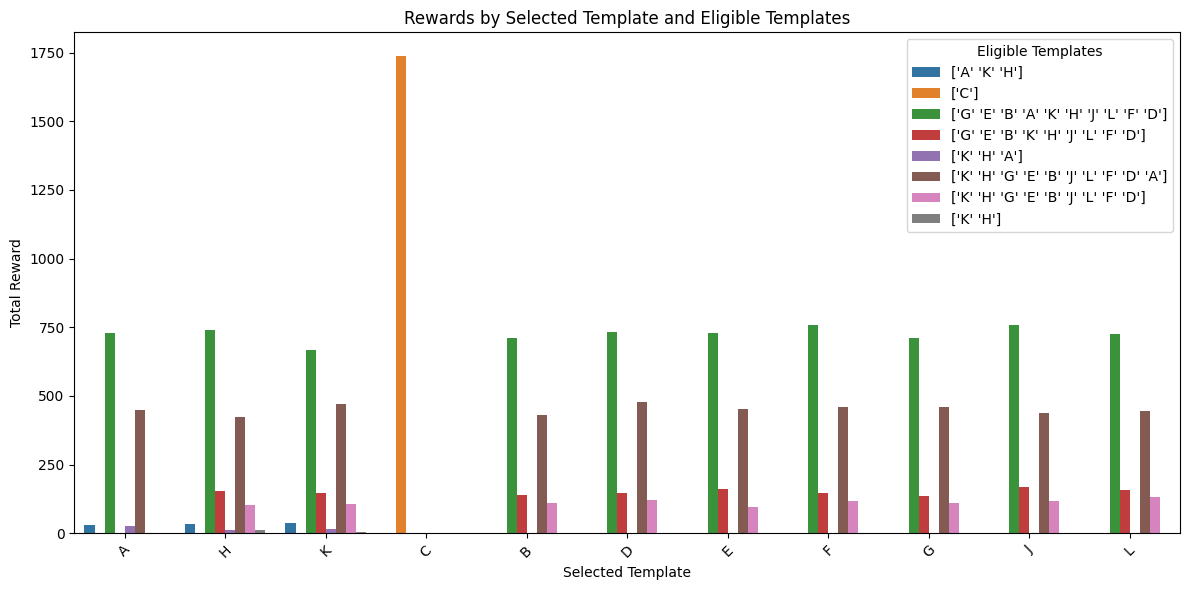

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='selected_template', y='reward', hue='eligible_templates')
plt.title('Rewards by Selected Template and Eligible Templates')
plt.xlabel('Selected Template')
plt.ylabel('Total Reward')
plt.xticks(rotation=45)
plt.legend(title='Eligible Templates')
plt.tight_layout()
plt.show()


In [7]:
#extract tempate:  from the history column
print(df["history"].iloc[0])



[{'template': 'J', 'n_days': 5.905725479125977}
 {'template': 'A', 'n_days': 4.150867462158203}
 {'template': 'J', 'n_days': 2.077929973602295}
 {'template': 'F', 'n_days': 1.0779223442077637}]


In [8]:
import ast 
# Fix missing commas between dictionaries
df['history'] = df['history'].apply(lambda x: x.replace("}\n {", "},\n {"))

df['history'].iloc[20]




"[{'template': 'G', 'n_days': 23.001449584960938},\n {'template': 'E', 'n_days': 22.001449584960938},\n {'template': 'E', 'n_days': 21.001447677612305},\n {'template': 'E', 'n_days': 20.001445770263672},\n {'template': 'F', 'n_days': 7.915061950683594},\n {'template': 'L', 'n_days': 6.935510635375977},\n {'template': 'J', 'n_days': 5.935513973236084},\n {'template': 'D', 'n_days': 4.873080253601074},\n {'template': 'G', 'n_days': 3.8730759620666504},\n {'template': 'H', 'n_days': 1.0000009536743164}]"

In [9]:
# Fix rows with missing commas
def fix_missing_commas(row):
    if isinstance(row, str):
        return row.replace("} {", "}, {")
    return row

df['history'] = df['history'].apply(fix_missing_commas)


In [10]:
# Parse only valid rows
def safe_parse(row):
    try:
        return ast.literal_eval(row)
    except (ValueError, SyntaxError):
        return None

df['history_parsed'] = df['history'].apply(lambda x: safe_parse(x) if isinstance(x, str) else None)


In [11]:
# Parse and convert the entire 'history' column
df['history_parsed'] = df['history'].apply(lambda x: pd.DataFrame(ast.literal_eval(x)))


In [12]:
df['history_parsed'].iloc[0]


template    n_days
0        J  5.905725
1        A  4.150867
2        J  2.077930
3        F  1.077922

## UI language explore

<Axes: xlabel='ui_language'>

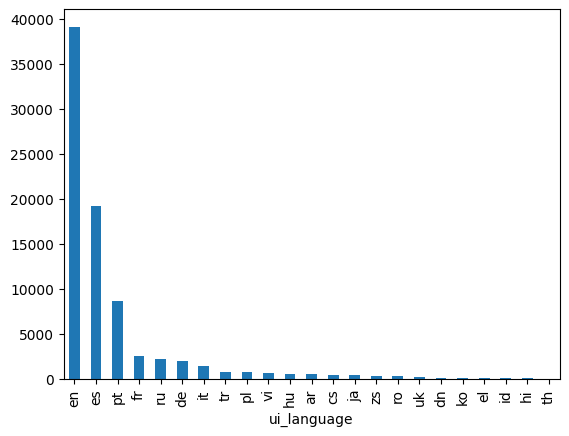

In [13]:
df['ui_language'].value_counts().plot(kind='bar')

In [14]:
df.head(20)

Unnamed: 0  index   datetime ui_language  \
0            0      0   3.179745          en   
1            1      1   4.040532          en   
2            2      2  13.274815          en   
3            3      3  10.324722          en   
4            4      4   0.036644          en   
5            5      5  11.133738          en   
6            6      6   2.628692          de   
7            7      7  11.873275          en   
8            8      8   6.760845          en   
9            9      9   9.950602          en   
10          10     10  11.644155          en   
11          11     11   6.515081          en   
12          12     12  12.284630          en   
13          13     13   3.465208          en   
14          14     14   7.633472          fr   
15          15     15   5.322882          en   
16          16     16   5.864491          en   
17          17     17   1.880104          en   
18          18     18   0.294907          de   
19          19     19  10.626678          en   

                           eligible_templates  \
0   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
1       ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
2       ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
3   ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']   
4       ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
5   ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']   
6   ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
7                                       ['C']   
8       ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
9       ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
10      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
11      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
12  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']   
13      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
14      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
15  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
16  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
17      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
18      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
19      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   

                                              history selected_template  \
0   [{'template': 'J', 'n_days': 5.905725479125977...                 B   
1   [{'template': 'A', 'n_days': 29.03866195678711...                 L   
2   [{'template': 'L', 'n_days': 3.863202810287475...                 J   
3   [{'template': 'C', 'n_days': 29.02988243103027...                 A   
4   [{'template': 'B', 'n_days': 17.01857376098632...                 L   
5   [{'template': 'C', 'n_days': 26.70750808715820...                 D   
6   [{'template': 'E', 'n_days': 29.98511695861816...                 E   
7   [{'template': 'E', 'n_days': 29.03020477294922...                 C   
8   [{'template': 'E', 'n_days': 29.72197532653808...                 E   
9   [{'template': 'B', 'n_days': 29.36462211608886...                 J   
10  [{'template': 'B', 'n_days': 27.01690673828125...                 E   
11  [{'template': 'G', 'n_days': 29.04347038269043...                 D   
12  [{'template': 'B', 'n_days': 29.68055534362793...                 L   
13  [{'template': 'G', 'n_days': 15.19757461547851...                 G   
14  [{'template': 'G', 'n_days': 29.13024139404297...                 D   
15  [{'template': 'C', 'n_days': 13.66613578796386...                 H   
16  [{'template': 'E', 'n_days': 29.06358337402343...                 G   
17  [{'template': 'A', 'n_days': 28.71801567077636...                 J   
18  [{'template': 'E', 'n_days': 27.96257400512695...                 H   
19  [{'template': 'E', 'n_days': 26.19577407836914...                 H   

    session_end_completed                                     history_parsed  
0                       0    template    n_days
0        J  5.905725
1   ...  
1                       0     template     n_days
0         A  29.038662
...  
2                       0    template    n_days
0        L  3.863203
1   ...  
3                       1     template     n_days
0         C  29.029882


In [15]:
# # Specify the file path and name for the CSV
# file_path = "cleaned_train.csv"

# # Save the DataFrame to a CSV file
# df.to_csv(file_path, index=False)

# Baseline Model 

In [16]:
config = {
    "iter" : 1500,
    "greedy" : 0.1
}

## Initialze arms 

In [17]:
#One Hot encoding 'eligible_templates' column, which contains values of lists

mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('eligible_templates')),
                        columns=mlb.classes_,
                        index=df.index))

#Initializing dictionary for eligible arms
arm_eligible_dict = deque.LimitedDict(max_values=500000)

#Stores each arm's score
arm_score = {}
arm_selected_dict = {}

lang = df['ui_language'].unique()

#Get unique arms from the concatenated array
unique_arms = []
for i in df['selected_template'].unique():
    for j in lang:
        unique_arms.append((i, j))


    #Initializing all arm scores as equal to begin
    arm_score[i] = 0
    indecies=df[df['selected_template'] == i].index.to_list()
    arm_selected_dict[i] = indecies

rows_with_arm = {}
for arm in unique_arms:
    rows_with_arm[arm] = (df[(df['selected_template'] == arm[0]) & (df['ui_language'] == arm[1])]).index

not_sel_dict = {}

for i in unique_arms:
        arm_eligible_dict.add_key(i)
        arm_eligible_dict.add_value(i, (df[(df['selected_template'] == arm[0]) & (df['ui_language'] == arm[1])]).index) 

        rows_with_eligible = df.loc[arm_eligible_dict.get_values(i)[0]]
        not_selected_indices = list(set(rows_with_eligible.index) - set(rows_with_arm[i]))
        not_sel_dict[i] = not_selected_indices

In [18]:
rows_with_eligible


Unnamed: 0  index   datetime ui_language  \
16761       16761    261   0.520093          hi   
56884       56884    384   7.924225          hi   
57091       57091     91  12.404155          hi   
69513       69513     13  12.457581          hi   
71515       71515     15  12.784988          hi   
78741       78741    241   1.015370          hi   

                                                 history selected_template  \
16761  [{'template': 'E', 'n_days': 1.999996542930603...                 F   
56884  [{'template': 'L', 'n_days': 3.036285638809204...                 F   
57091  [{'template': 'C', 'n_days': 2.999995231628418...                 F   
69513  [{'template': 'A', 'n_days': 2.000000953674316...                 F   
71515  [{'template': 'F', 'n_days': 11.99237442016601...                 F   
78741                                                 []                 F   

       session_end_completed  \
16761                      0   
56884                      0   
57091                      0   
69513                      0   
71515                      0   
78741                      0   

                                          history_parsed     '  ...  D  E  F  \
16761    template    n_days
0        E  1.999997
1   ...  1  1  ...  1  1  1   
56884    template    n_days
0        L  3.036286
1   ...  1  1  ...  1  1  1   
57091    template    n_days
0        C  2.999995
1   ...  1  1  ...  1  1  1   
69513    template    n_days
0        A  2.000001
1   ...  1  1  ...  1  1  1   
71515    template     n_days
0        F  11.992374
1 ...  1  1  ...  1  1  1   
78741              Empty DataFrame
Columns: []
Index: []  1  1  ...  1  1  1   

       G  H  J  K  L  [  ]  
16761  1  1  1  1  1  1  1  
56884  1  1  1  1  1  1  1  
57091  1  1  1  1  1  1  1  
69513  1  1  1  1  1  1  1  
71515  1  1  1  1  1  1  1  
78741  1  1  1  1  1  1  1  

[6 rows x 23 columns]

In [19]:
arm_score

{'B': 0,
 'L': 0,
 'J': 0,
 'A': 0,
 'D': 0,
 'E': 0,
 'C': 0,
 'G': 0,
 'H': 0,
 'K': 0,
 'F': 0}

## initialization with lang

In [20]:
# # Track the number of times each arm is selected
# arm_play_counts = {arm: 1 for arm in unique_arms}  # Start with each arm being selected once

# # Track the cumulative reward for each arm
# arm_rewards = {arm: 0 for arm in unique_arms}  # Start with zero cumulative reward

# # Define a constant for exploration-exploitation tradeoff
# c = 0.5  # Higher values favor exploration over exploitation


In [21]:
# Assuming all_possible_arms is a list or set of all arms (templates) in the dataset
all_possible_arms = set(arm for row in df['selected_template'] for arm in row)

# Initialize arm_play_counts and arm_rewards
arm_play_counts = {arm: 0 for arm in all_possible_arms}  # Tracks the number of times each arm is played
arm_rewards = {arm: 0.0 for arm in all_possible_arms}    # Tracks the cumulative rewards for each arm

# Print to verify initialization
print("Initialized arm_play_counts:", arm_play_counts)
print("Initialized arm_rewards:", arm_rewards)

# Define a constant for exploration-exploitation tradeoff
c = 0.5  # Higher values favor exploration over exploitation



Initialized arm_play_counts: {'K': 0, 'G': 0, 'E': 0, 'D': 0, 'J': 0, 'F': 0, 'L': 0, 'H': 0, 'C': 0, 'B': 0, 'A': 0}
Initialized arm_rewards: {'K': 0.0, 'G': 0.0, 'E': 0.0, 'D': 0.0, 'J': 0.0, 'F': 0.0, 'L': 0.0, 'H': 0.0, 'C': 0.0, 'B': 0.0, 'A': 0.0}


In [32]:
def calculate_ucb(arm, eligible_arms):
    """Calculate the UCB score for a given arm, considering eligible arms in the current round."""
    # Ensure the arm has been played at least once
    if arm_play_counts[arm] == 0:
        return float('inf')  # Ensure each arm is selected at least once

    # Calculate the average reward for the arm Q = R/N
    avg_reward = arm_rewards[arm] / arm_play_counts[arm]
    print("Average reward for arm", arm, "is", avg_reward)

    # Calculate the Upper Confidence Bound with exploration-exploitation tradeoff
    confidence_bound = c * np.sqrt(np.log(avg_reward) / arm_play_counts[arm])

    return avg_reward + confidence_bound


In [9]:
df = pd.read_csv('cleaned_train.csv')
df.head()

Unnamed: 0  index   datetime ui_language  \
0           0      0   3.179745          en   
1           1      1   4.040532          en   
2           2      2  13.274815          en   
3           3      3  10.324722          en   
4           4      4   0.036644          en   

                          eligible_templates  \
0  ['G' 'E' 'B' 'A' 'K' 'H' 'J' 'L' 'F' 'D']   
1      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   
2      ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D']   
3  ['K' 'H' 'G' 'E' 'B' 'J' 'L' 'F' 'D' 'A']   
4      ['G' 'E' 'B' 'K' 'H' 'J' 'L' 'F' 'D']   

                                             history selected_template  \
0  [{'template': 'J', 'n_days': 5.905725479125977...                 B   
1  [{'template': 'A', 'n_days': 29.03866195678711...                 L   
2  [{'template': 'L', 'n_days': 3.863202810287475...                 J   
3  [{'template': 'C', 'n_days': 29.02988243103027...                 A   
4  [{'template': 'B', 'n_days': 17.01857376098632...                 L   

   session_end_completed                                     history_parsed  
0                      0    template    n_days\n0        J  5.905725\n1 ...  
1                      0     template     n_days\n0         A  29.038662...  
2                      0    template    n_days\n0        L  3.863203\n1 ...  
3                      1     template     n_days\n0         C  29.029882...  
4                      0    template     n_days\n0        B  17.018574\n...

# UCB Implement Improvement

In [10]:
import re
import numpy as np
import math
import pandas as pd

# Initialize variables
total_sum = 0
old_policy = {}
soft_max_prob = {}
explore = 0.5  # Exploration parameter for softmax scaling
ucb_selected_templates = []
ucb_rewards = []
arm_play_counts = {}  # Tracks the number of times each arm has been played
arm_rewards = {}  # Tracks the cumulative rewards for each arm
c = 0.5  # Exploration-exploitation tradeoff parameter

# Calculate UCB scores for all arms
def calculate_ucb(arm_rewards, arm_play_counts, total_plays, c=1.0):
    ucb_scores = {}
    for arm in arm_rewards:
        if arm_play_counts[arm] == 0:
            ucb_scores[arm] = float('inf')  # Encourage exploration for unplayed arms
        else:
            avg_reward = arm_rewards[arm] / arm_play_counts[arm]
            confidence = c * np.sqrt(np.log(total_plays) / arm_play_counts[arm])
            ucb_scores[arm] = avg_reward + confidence
    return ucb_scores

# Softmax function with numerical stability
def softmax(scores):
    cleaned_scores = {arm: score if np.isfinite(score) else 0 for arm, score in scores.items()}
    max_score = max(cleaned_scores.values())  # Prevent overflow
    exp_scores = {arm: np.exp(score - max_score) for arm, score in cleaned_scores.items()}
    total = sum(exp_scores.values())
    return {arm: exp_score / total for arm, exp_score in exp_scores.items()}

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Parse eligible templates
    eligible_arms = row['eligible_templates']
    if isinstance(eligible_arms, str):
        eligible_arms = re.findall(r"'(\w+)'", eligible_arms)

    # Initialize arm play counts and rewards if new arms are found
    for arm in eligible_arms:
        if arm not in arm_play_counts:
            arm_play_counts[arm] = 0
            arm_rewards[arm] = 0

    # Total plays for UCB calculation
    total_plays = sum(arm_play_counts.values())

    # Calculate UCB scores for eligible arms
    ucb_scores = {arm: calculate_ucb(arm_rewards, arm_play_counts, total_plays, c=c).get(arm, 0) for arm in eligible_arms}

    # Select the arm with the highest UCB score
    selected_arm = max(ucb_scores, key=ucb_scores.get)
    ucb_selected_templates.append(selected_arm)

    # Calculate old policy (uniform distribution) and softmax probabilities
    old_policy = {arm: 1 / len(eligible_arms) for arm in eligible_arms}
    soft_max_prob = softmax(ucb_scores)

    # Apply weighted multiplication of new policy if reward is 1
    if row['session_end_completed'] == 1:
        diff = {arm: soft_max_prob[arm] / old_policy[arm] for arm in soft_max_prob}
        print("Difference in probabilities:", diff)
        value_to_multiply = diff[selected_arm]
        result = row['session_end_completed'] * value_to_multiply
        df.at[index, 'result'] = result
        total_sum += result

        # Update arm play counts and rewards
        arm_play_counts[selected_arm] += 1
        arm_rewards[selected_arm] += row['session_end_completed']

    # Debugging outputs


# Calculate the new reward
new_reward = (1 / len(df)) * total_sum
print("New Reward:", new_reward)


Difference in probabilities: {'K': np.float64(1.0), 'H': np.float64(1.0), 'G': np.float64(1.0), 'E': np.float64(1.0), 'B': np.float64(1.0), 'J': np.float64(1.0), 'L': np.float64(1.0), 'F': np.float64(1.0), 'D': np.float64(1.0), 'A': np.float64(1.0)}
Difference in probabilities: {'K': np.float64(2.319693166840739), 'H': np.float64(0.8533674259065844), 'G': np.float64(0.8533674259065844), 'E': np.float64(0.8533674259065844), 'B': np.float64(0.8533674259065844), 'J': np.float64(0.8533674259065844), 'L': np.float64(0.8533674259065844), 'F': np.float64(0.8533674259065844), 'D': np.float64(0.8533674259065844), 'A': np.float64(0.8533674259065844)}
Difference in probabilities: {'C': np.float64(1.0)}
Difference in probabilities: {'G': np.float64(0.556181203777166), 'E': np.float64(0.556181203777166), 'B': np.float64(0.556181203777166), 'K': np.float64(2.5533657867799198), 'H': np.float64(2.5533657867799198), 'J': np.float64(0.556181203777166), 'L': np.float64(0.556181203777166), 'F': np.float64

Difference in probabilities: {'G': np.float64(0.9993035647181815), 'E': np.float64(0.9993035647181815), 'B': np.float64(0.9993035647181815), 'A': np.float64(1.0006964352818184), 'K': np.float64(0.9993035647181815), 'H': np.float64(0.9993035647181815), 'J': np.float64(1.0006964352818184), 'L': np.float64(1.0006964352818184), 'F': np.float64(1.0006964352818184), 'D': np.float64(1.0006964352818184)}
Difference in probabilities: {'G': np.float64(0.9994427125303229), 'E': np.float64(0.9994427125303229), 'B': np.float64(0.9994427125303229), 'A': np.float64(0.9994427125303229), 'K': np.float64(0.9994427125303229), 'H': np.float64(0.9994427125303229), 'J': np.float64(1.0008359312045152), 'L': np.float64(1.0008359312045152), 'F': np.float64(1.0008359312045152), 'D': np.float64(1.0008359312045152)}
Difference in probabilities: {'G': np.float64(0.9995819299944556), 'E': np.float64(0.9995819299944556), 'B': np.float64(0.9995819299944556), 'A': np.float64(0.9995819299944556), 'K': np.float64(0.9995

In [13]:
import re
import numpy as np
import math
import pandas as pd

# Initialize variables
total_sum = 0
old_policy = {}
soft_max_prob = {}
explore = 0.5  # Exploration parameter for softmax scaling
ucb_selected_templates = []
ucb_rewards = []
arm_play_counts = {}  # Tracks the number of times each arm has been played
arm_rewards = {}  # Tracks the cumulative rewards for each arm
c = 0.5  # Exploration-exploitation tradeoff parameter

# Track cumulative rewards for visualization
cumulative_rewards_new_policy = []
cumulative_rewards_old_policy = []

total_sum_new_policy = 0
total_sum_old_policy = 0


# Calculate UCB scores for all arms
def calculate_ucb(arm_rewards, arm_play_counts, total_plays, c=1.0):
    ucb_scores = {}
    for arm in arm_rewards:
        if arm_play_counts[arm] == 0:
            ucb_scores[arm] = float('inf')  # Encourage exploration for unplayed arms
        else:
            avg_reward = arm_rewards[arm] / arm_play_counts[arm]
            confidence = c * np.sqrt(np.log(total_plays) / arm_play_counts[arm])
            ucb_scores[arm] = avg_reward + confidence
    return ucb_scores

# Softmax function with numerical stability
def softmax(scores):
    cleaned_scores = {arm: score if np.isfinite(score) else 0 for arm, score in scores.items()}
    max_score = max(cleaned_scores.values())  # Prevent overflow
    exp_scores = {arm: np.exp(score - max_score) for arm, score in cleaned_scores.items()}
    total = sum(exp_scores.values())
    return {arm: exp_score / total for arm, exp_score in exp_scores.items()}

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Parse eligible templates
    eligible_arms = row['eligible_templates']
    if isinstance(eligible_arms, str):
        eligible_arms = re.findall(r"'(\w+)'", eligible_arms)

    # Initialize arm play counts and rewards if new arms are found
    for arm in eligible_arms:
        if arm not in arm_play_counts:
            arm_play_counts[arm] = 0
            arm_rewards[arm] = 0

    # Total plays for UCB calculation
    total_plays = sum(arm_play_counts.values())

    # Calculate UCB scores for eligible arms
    ucb_scores = {arm: calculate_ucb(arm_rewards, arm_play_counts, total_plays, c=c).get(arm, 0) for arm in eligible_arms}

    # Select the arm with the highest UCB score
    selected_arm = max(ucb_scores, key=ucb_scores.get)
    ucb_selected_templates.append(selected_arm)

    # Calculate old policy (uniform distribution) and softmax probabilities
    old_policy = {arm: 1 / len(eligible_arms) for arm in eligible_arms}
    soft_max_prob = softmax(ucb_scores)
    
    # Get the arm with the highest softmax probability
    selected_arm = max(soft_max_prob, key=soft_max_prob.get)
    selected_prob = soft_max_prob[selected_arm]

    # Apply weighted multiplication of new policy if reward is 1
    if row['session_end_completed'] == 1:
        total_sum_old_policy += 1
       # Compare the selected arm's probability with its old policy
        diff = selected_prob / old_policy[selected_arm]
        print(f"Difference for Selected Arm '{selected_arm}': {diff}")
        # value_to_multiply = diff[selected_arm]
        result = row['session_end_completed'] * diff
        # result = row['session_end_completed'] * value_to_multiply
        df.at[index, 'result'] = result
        total_sum += result
        total_sum_new_policy += row['session_end_completed'] * diff


        # Update arm play counts and rewards
        arm_play_counts[selected_arm] += 1
        arm_rewards[selected_arm] += row['session_end_completed']

    # Debugging outputs
    # Track cumulative rewards for visualization
    cumulative_rewards_new_policy.append(total_sum_new_policy)
    cumulative_rewards_old_policy.append(total_sum_old_policy)



# Calculate the new reward
new_reward = (1 / len(df)) * total_sum
print("New Reward:", new_reward)


Difference for Selected Arm 'K': 1.0
Difference for Selected Arm 'K': 2.319693166840739
Difference for Selected Arm 'C': 1.0
Difference for Selected Arm 'K': 2.96864596624638
Difference for Selected Arm 'C': 1.0
Difference for Selected Arm 'C': 1.0
Difference for Selected Arm 'K': 3.0771710703999453
Difference for Selected Arm 'K': 2.9975078742787313
Difference for Selected Arm 'K': 2.8736922800218583
Difference for Selected Arm 'K': 2.8349585495029066
Difference for Selected Arm 'K': 2.869061653832928
Difference for Selected Arm 'K': 2.8424865770895784
Difference for Selected Arm 'K': 2.82013032635625
Difference for Selected Arm 'K': 2.8009348679719386
Difference for Selected Arm 'C': 1.0
Difference for Selected Arm 'K': 2.790580664881581
Difference for Selected Arm 'K': 2.775019495848641
Difference for Selected Arm 'K': 2.7611709165965745
Difference for Selected Arm 'K': 2.7487294582138744
Difference for Selected Arm 'K': 2.7374620937009273
Difference for Selected Arm 'C': 1.0
Differ

## Visualization of UCB compared to baseline model

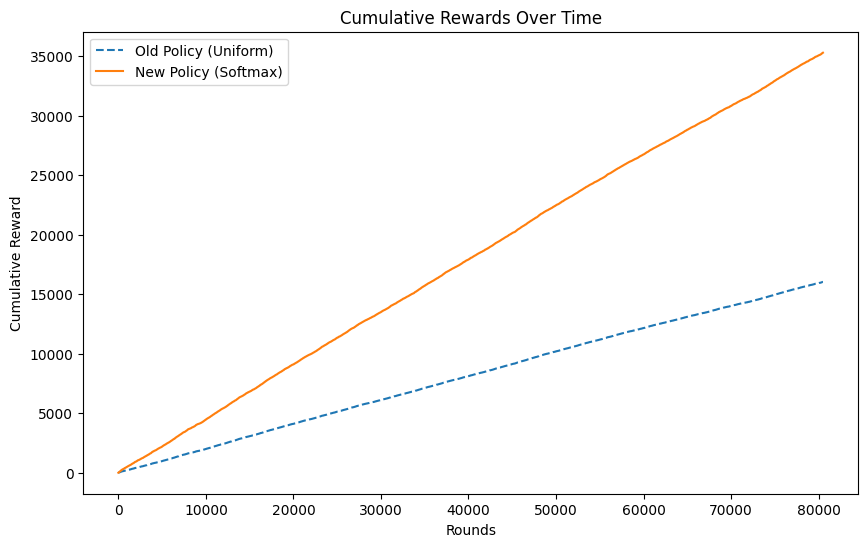

In [14]:
def visualize_rewards(cumulative_rewards_old, cumulative_rewards_new):
    rounds = range(len(cumulative_rewards_old))
    plt.figure(figsize=(10, 6))
    plt.plot(rounds, cumulative_rewards_old, label="Old Policy (Uniform)", linestyle="dashed")
    plt.plot(rounds, cumulative_rewards_new, label="New Policy (Softmax)", linestyle="solid")
    plt.xlabel("Rounds")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Rewards Over Time")
    plt.legend()
    plt.show()

# Call the visualization function
visualize_rewards(cumulative_rewards_old_policy, cumulative_rewards_new_policy)
